This post is a little bit of an experiment, in two areas:

1. Playing with some of my own data, using a language that I'm quite familiar with (Python) and a mixture of tools which are old and new to me; and
2. Publishing that investigation directly on my blog, as a static IPython Notebook export.

The data I'll be using is information about my exercise that I've been tracking over the last few years using [RunKeeper](https://runkeeper.com/).  RunKeeper allows you to [export and download your full exercise history](https://support.runkeeper.com/hc/en-us/articles/201109886-How-to-Export-your-RunKeeper-data), including GPX files showing where you went on each activity, and a couple of summary files in CSV format.  It's this latter that I'm going to take a look at; just an initial survey to see if there's anything interesting that jumps out.

I'm not expecting any massive insights just yet, but I hope you find this a useful introduction to some very valuable data wrangling and analysis tools.

## Looking at the data

First up, we need to do some basic setup:

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from IPython.display import display

This imports some Python packages that we'll need:

- [matplotlib](http://matplotlib.org): makes pretty plots (the `%matplotlib inline` bit is some IPython Notebook magic to make plots appear inline)
- [numpy](http://numpy.org): allows some maths and stats functions
- [pandas](http://pandas.pydata.org): loads and manipulates tabular data

Next, let's check what files we have to work with:

In [2]:
%ls data/*.csv

data/cardioActivities.csv  data/measurements.csv


I'm interested in `cardioActivities.csv`, which contains a summary of each activity in my RunKeeper history.  Loading it up gives us this:

In [3]:
cardio = pd.read_csv('data/cardioActivities.csv',
                     parse_dates=[0, 4, 5],
                     index_col=0)
display(cardio.head())

,Type,Route Name,Distance (mi),Duration,Average Pace,Average Speed (mph),Calories Burned,Climb (ft),Average Heart Rate (bpm),Notes,GPX File
Date,,,,,,,,,,,
2015-03-27 12:26:34,Running,NaN,3.31,29:57,9:03,6.63,297,48.45,157,NaN,2015-03-27-1226.gpx
2015-03-21 09:44:25,Running,NaN,11.31,2:12:01,11:40,5.14,986,283.41,146,NaN,2015-03-21-0944.gpx
2015-03-19 07:21:36,Running,NaN,5.17,52:45,10:12,5.88,423,75.23,150,NaN,2015-03-19-0721.gpx
2015-03-17 06:51:42,Running,NaN,1.81,17:10,9:29,6.32,144,23.27,137,NaN,2015-03-17-0651.gpx
2015-03-17 06:21:51,Running,NaN,0.94,7:25,7:52,7.64,17,3.65,136,NaN,2015-03-17-0621.gpx


Although my last few activities are runs, there are actually several different possible values for the "Type" column. We can take a look like this:

In [4]:
cardio['Type'] = cardio['Type'].astype('category')
print(cardio['Type'].cat.categories)

Index(['Cycling', 'Hiking', 'Running', 'Walking'], dtype='object')


From this you can see there are four types: Cycling, Hiking, Running and Walking. Right now, I'm only interested in my runs, so let's select those and do an initial plot.

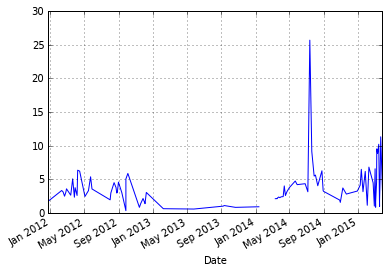

In [5]:
runs = cardio[cardio['Type'] == 'Running']
runs['Distance (mi)'].plot()

We can notice two things straight away:

- There's a gap at the start of 2014: this is probably where RunKeeper hasn't got information about the distance because my GPS watch didn't work right or something, and I don't want to include these in my analysis.
- There's a big spike from where I did the [12 Labours of Hercules ultramarathon](http://beyondmarathon.com/12-labours-of-hercules/), which isn't really an ordinary run so I don't want to include that either.

Let's do some filtering (excluding those, and some runs with "unreasonable" speeds that might be mislabelled runs or cycles) and try again.

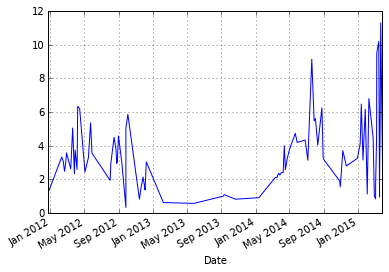

In [6]:
runs = runs[(runs['Distance (mi)'] <= 15)
            & runs['Average Speed (mph)'].between(3.5, 10)]
runs['Distance (mi)'].plot()

That looks much better.  Now we can clearly see the break I took between late 2012 and early 2014 (problems with my [iliotibial band](http://en.wikipedia.org/wiki/Iliotibial_band_syndrome)), followed by a gradual return to training and an increase in distance leading up to my recent half-marathon.

There are other types of plot we can look at too.  How about a histogram of my run distances?

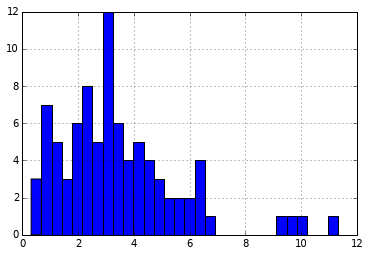

In [7]:
runs['Distance (mi)'].hist(bins=30)

You can clearly see here the divide between my usual weekday runs (usually around 3–5 miles) and my longer weekend runs.  I've only been running >7 miles very recently, but I suspect as time goes on this graph will start to show two distinct peaks.  There also seem to be peaks around whole numbers of miles: it looks like I have a tendency to finish my runs shortly after the distance readout on my watch ticks over!  The smaller peak around 1 mile is where I run to the gym as a warmup before a strength workout.

How fast do I run? Let's take a look.

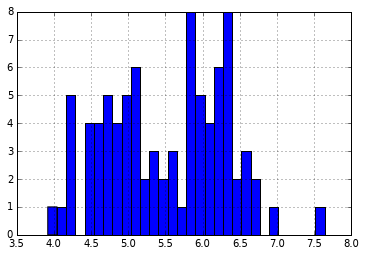

In [8]:
runs['Average Speed (mph)'].hist(bins=30)

Looks like another [bimodal distribution](http://en.wikipedia.org/wiki/Multimodal_distribution).  There's not really enough data here to be sure, but this could well be a distinction between longer, slower runs and shorter, faster ones.  Let's try plotting distance against speed to get a better idea.

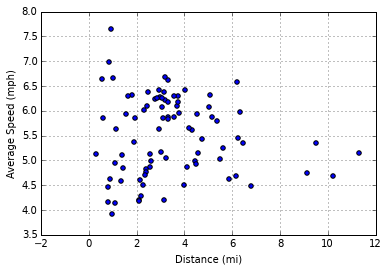

In [9]:
runs.plot(kind='scatter', x='Distance (mi)', y='Average Speed (mph)')

Hmm, no clear trend here.  Maybe that's because when I first started running I was nowhere near so fit as I am now, so those early runs were both short *and* slow!  What if we restrict it just to this year?

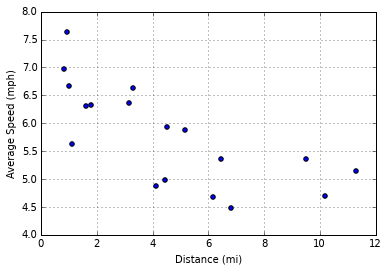

In [10]:
runs = runs.loc[runs.index > '2015-01-01']
runs.plot(kind='scatter', x='Distance (mi)', y='Average Speed (mph)')

That's better: now it's clear to see that, in general, the further I go, the slower I run!

So, as expected, no major insights.  Now that I'm over my knee injury and back to training regularly, I'm hoping that I'll be able to collect more data and learn a bit more about how I exercise and maybe even make some improvements.

How about you? What data do you have that might be worth exploring?  If you haven't anything of your own, try browsing through one of these:

- [data.gov.uk](http://data.gov.uk)
- [datahub](http://datahub.io)
- [figshare](http://figshare.com)
- [Zenodo](http://zenodo.org)